# Water Balance for an Irrigation Water Supply Reservoir

An irrigation water supply reservoir draining flows from the Rocky Mountains has a capacity of 750,000 acre-feet. At the end of the water year, the reservoir is full. Over the next water year, the following net inflows $Q_i$ into the reservoir occurred:

In [41]:
inflows = {
    'Oct':68887.00,
    'Nov':46851.00,
    'Dec':38120.00,
    'Jan':36363.00,
    'Feb':32312.00,
    'Mar':42380.00,
    'Apr':62097.00,
    'May':256676.00,
    'Jun':604743.00,
    'Jul':327718.00,
    'Aug':155511.00,
    'Sep':58421.00
}

demand = 120000.00 # for agriculture
nature = 1000.00   # for the fishes
res_max = 750000 #acre feet

**A) Predict the reservoir storage and spilled flow volume for each month.**

Storage volume, $V$, at the end of a month, $i$, can be defined as:

$$V_{i} = \max \begin{cases} V_{i-1} - D_{i} - N_{i} + Q_{i} \\ V_{max} \end{cases}$$

Where:
- $V_{i-1}$ is the volume of the reservoir at the end of the month prior,
- $D_{i}$ is the withdrawal demand,
- $N_{i}$ is the required releases for nature (Fishes!),
- $Q_{i}$ is the inflow to the reservoir, and
- $V_{max}$ is the maximum capacity of the reservoir.

For the month of October, this equation would be:

$$V_{Oct} = \max \begin{cases} V_{Sep} - D_{Oct} - N_{Oct} + Q_{Oct} \\ V_{max} \end{cases}$$


The reservoir volume at the end of the month can be calculated by stepping through a for loop. Code below.

In [48]:
# Instantiate our lists for reservoir volume and release volumes
reservoir_v = [res_max]
release = [0]

# Step through the inflows dictionary we defined above
for i in inflows.keys():
    
    # Subtract Demand from last months total
    # Add supply
    # Assign value as new end of list
    reservoir_v.append(reservoir_v[-1] - demand - nature + inflows[i])
    
    # if theoretical total greater than capacity, release
    if reservoir_v[-1] > res_max:
        print("release in month: " + i)
        release.append(reservoir_v[-1] - res_max)
        reservoir_v[-1] = res_max
    
    # else, release = 0
    else:
        release.append(0)

release in month: Jun
release in month: Jul
release in month: Aug


**B) Plot the reservoir storage (in acre-feet) at the end of each time step.**

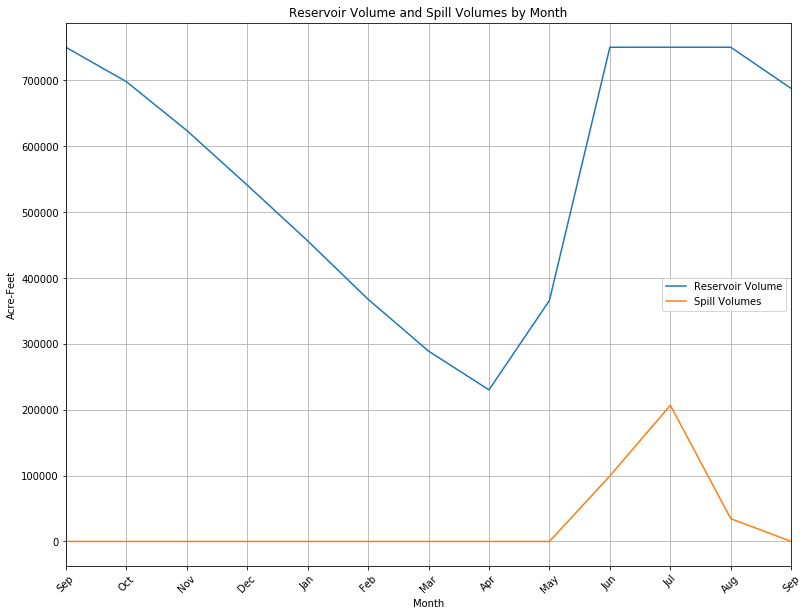

In [49]:
import matplotlib.pyplot as plt
import numpy as np
labels = ['Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
fig,ax = plt.subplots(figsize=(13,10))
plt.plot(reservoir_v)
plt.plot(release)
plt.xticks(np.arange(len(release)), labels, rotation=45)
plt.legend(['Reservoir Volume','Spill Volumes'])
plt.title("Reservoir Volume and Spill Volumes by Month")
plt.ylabel("Acre-Feet")
plt.xlabel("Month")
plt.grid(True)
plt.xlim([0,12])
plt.savefig("ReservoirStorageAndSpillVolumes.png")
plt.show()

**C) Does the reservoir refill and spill flow? If so, when and for how long?**

Yes, the reservoir refills and release do occur. During June, July, and August the reservoir experiences releases.